In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [51]:
df =df =  pd.read_csv("/Users/krushna/Downloads/train-2.csv", usecols=['Age','Fare','Survived'])

In [52]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [53]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [54]:
# WE have mising values only in age

In [55]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [63]:
 x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state= 42)

In [64]:
# create a duplicate age, where we will impute values ans check.
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [65]:
# Step 1: Identify null values in the 'Age_imputed' column
null_mask = x_train['Age_imputed'].isnull()

# Step 2: Generate random samples from the non-null 'Age' column
# We sample with the same number of null values in 'Age_imputed'
sampled_ages = x_train['Age'].dropna().sample(null_mask.sum(), replace=True).values

# Step 3: Assign these random samples to the null positions in 'Age_imputed'
x_train.loc[null_mask, 'Age_imputed'] = sampled_ages


In [66]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,46.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


## Now we have new column with imputed values.

/tmp/ipykernel_19685/3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19685/3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an

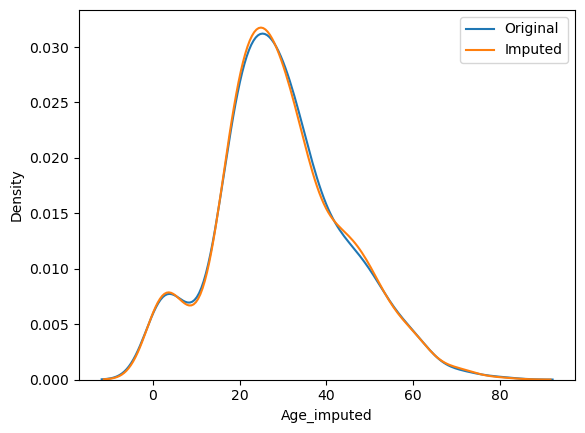

In [67]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

<Axes: >

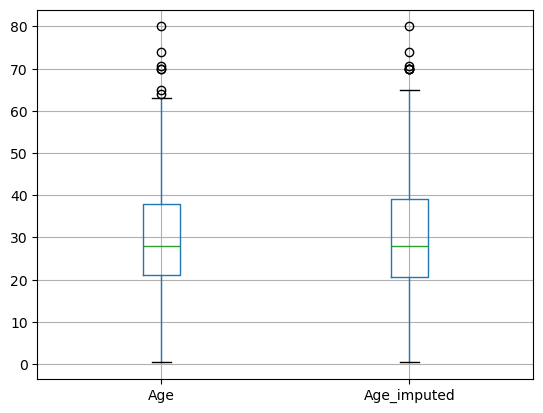

In [68]:
x_train[['Age', 'Age_imputed']].boxplot()

In [69]:
observation = x_test.iloc[0]
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [70]:
data = pd.read_csv('/Users/krushna/Downloads/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [71]:
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [72]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [73]:
# This is the same senerio where the value is missing more than 50%

In [74]:
x = data
y = data['SalePrice']

In [75]:
 x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state= 42)

In [86]:
# create a duplicate age, where we will impute values ans check.
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']

x_test['GarageQual_imputed'] = x_test['GarageQual']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [87]:
# Step 1: Identify null values in the 'GarageQu_imputed' column
null_mask = x_train['GarageQual_imputed'].isnull()

# Step 2: Generate random samples from the non-null 'GarageQu' column
# We sample with the same number of null values in 'GarageQu_imputed'
sampled_ages = x_train['GarageQual'].dropna().sample(null_mask.sum(), replace=True).values

# Step 3: Assign these random samples to the null positions in 'GarageQu_imputed'
x_train.loc[null_mask, 'GarageQual_imputed'] = sampled_ages


# Step 1: Identify null values in the 'GarageQu_imputed' column
null_mask = x_test['GarageQual_imputed'].isnull()

# Step 2: Generate random samples from the non-null 'GarageQu' column
# We sample with the same number of null values in 'GarageQu_imputed'
sampled_ages = x_test['GarageQual'].dropna().sample(null_mask.sum(), replace=True).values

# Step 3: Assign these random samples to the null positions in 'GarageQu_imputed'
x_test.loc[null_mask, 'GarageQual_imputed'] = sampled_ages

In [88]:
# Step 1: Identify null values in the 'FireplaceQu_imputed' column
null_mask = x_train['FireplaceQu_imputed'].isnull()

# Step 2: Generate random samples from the non-null 'FireplaceQu' column
# We sample with the same number of null values in 'FireplaceQu_imputed'
sampled_ages = x_train['FireplaceQu'].dropna().sample(null_mask.sum(), replace=True).values

# Step 3: Assign these random samples to the null positions in 'FireplaceQu_imputed'
x_train.loc[null_mask, 'FireplaceQu_imputed'] = sampled_ages


# Step 1: Identify null values in the 'FireplaceQu_imputed' column
null_mask = x_test['FireplaceQu_imputed'].isnull()

# Step 2: Generate random samples from the non-null 'FireplaceQu' column
# We sample with the same number of null values in 'FireplaceQu_imputed'
sampled_ages = x_test['FireplaceQu'].dropna().sample(null_mask.sum(), replace=True).values

# Step 3: Assign these random samples to the null positions in 'FireplaceQu_imputed'
x_test.loc[null_mask, 'FireplaceQu_imputed'] = sampled_ages

In [89]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQu_imputed,FireplaceQu_imputed,GarageQual_imputed
254,NaN,TA,145000,TA,Gd,TA
1066,TA,TA,178000,TA,TA,TA
638,NaN,NaN,85000,TA,TA,TA
799,TA,TA,175000,TA,TA,TA
380,Gd,TA,127000,TA,Gd,TA
...,...,...,...,...,...,...
1095,Gd,TA,176432,TA,Gd,TA
1130,TA,TA,135000,TA,TA,TA
1294,NaN,TA,115000,TA,TA,TA
860,Gd,TA,189950,TA,Gd,TA


In [90]:
# Lets the frequency after and before Imputation
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts()/len(x_train)
    ],axis =1 )
temp.columns = ['orignal' , 'imputed']

In [91]:
temp

,orignal,imputed
TA,0.951087,0.951199
Fa,0.032609,0.032534
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


There is not a big difference in the observations. So, we can say that yes we can impute the values.
Lets Try fo the other category

In [92]:
# Lets the frequency after and before Imputation
temp1 = pd.concat(
    [
        x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
    ],axis =1 )
temp1.columns = ['orignal' , 'imputed']

In [93]:
temp1

,orignal,imputed
Gd,0.491143,0.482877
TA,0.405797,0.415240
Fa,0.043478,0.038527
Ex,0.033816,0.034247
Po,0.025765,0.029110


Before imputation vs SalesPrice 

/tmp/ipykernel_19685/2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19685/2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

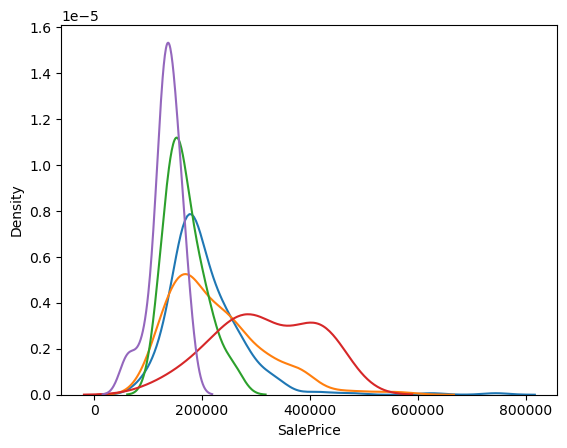

In [94]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipykernel_19685/1886255618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19685/1886255618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

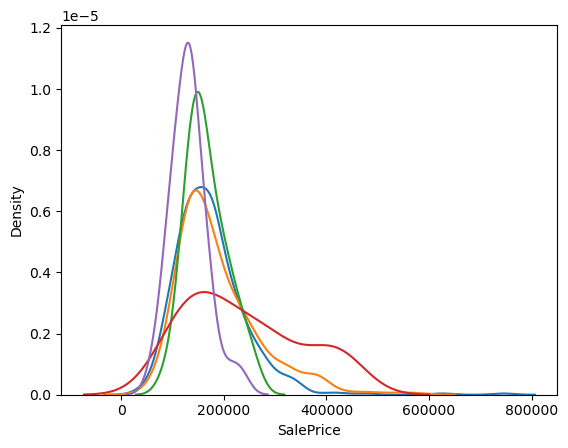

In [96]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()